In [1]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score, \
    roc_curve, precision_recall_curve, auc, f1_score, matthews_corrcoef

In [2]:
# Load training data
Xtrain = np.loadtxt('Xtrain.csv')

# Load training labels
Ytrain = np.loadtxt('Ytrain.csv')

# Load test data
Xtest = np.loadtxt('Xtest.csv')

## Question No. 6 Another classification problem

In [8]:
import numpy as np
from scipy import ndimage

num_images, height, width = 3000, 28, 28

min_angle = 0
max_angle = 360

random_angles = np.random.uniform(low=min_angle, high=max_angle, size=num_images)

rotated_images = [ndimage.rotate(image.reshape((height, width)), angle, reshape=False) 
                  for image, angle in zip(Xtrain, random_angles)]

Xtrain_rotated = np.array(rotated_images).reshape(3000, 784)

In [10]:
Xtrain_rotated.shape

(3000, 784)

In [19]:
smoothed_images = [ndimage.gaussian_filter(image, sigma=1)
                   for image in Xtest]

Xtest_smoothed = np.array(smoothed_images).reshape(3000, 784)

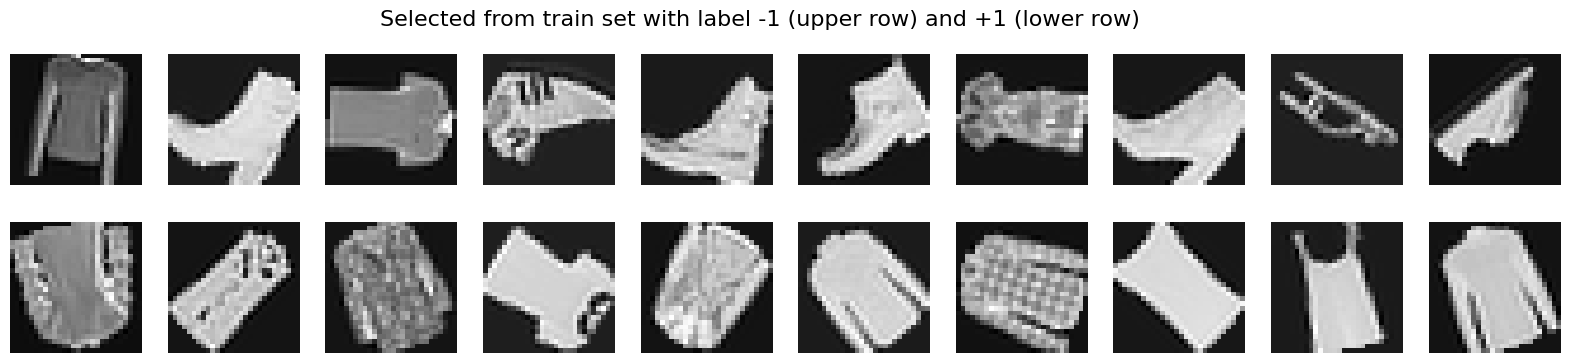

In [11]:
import matplotlib.pyplot as plt

num_classes = 2
class_labels = [-1, 1]

# Create a figure for plotting
fig, axes = plt.subplots(num_classes, 10, figsize=(20, 4))

# Iterate through each class
for i in range(num_classes):
    # Select 10 random objects from each class
    class_indices = np.where(Ytrain == class_labels[i])[0]
    random_indices = np.random.choice(class_indices, size=10, replace=False)
    random_objects = Xtrain_rotated[random_indices]

    # Reshape and display the flattened 28x28 arrays
    for j in range(10):
        axes[i, j].matshow(random_objects[j].reshape(28, 28), cmap='gray')
        axes[i, j].axis('off')

# Add a title to the entire figure
plt.suptitle('Selected from train set with label -1 (upper row) and +1 (lower row)', fontsize=16)

plt.show()

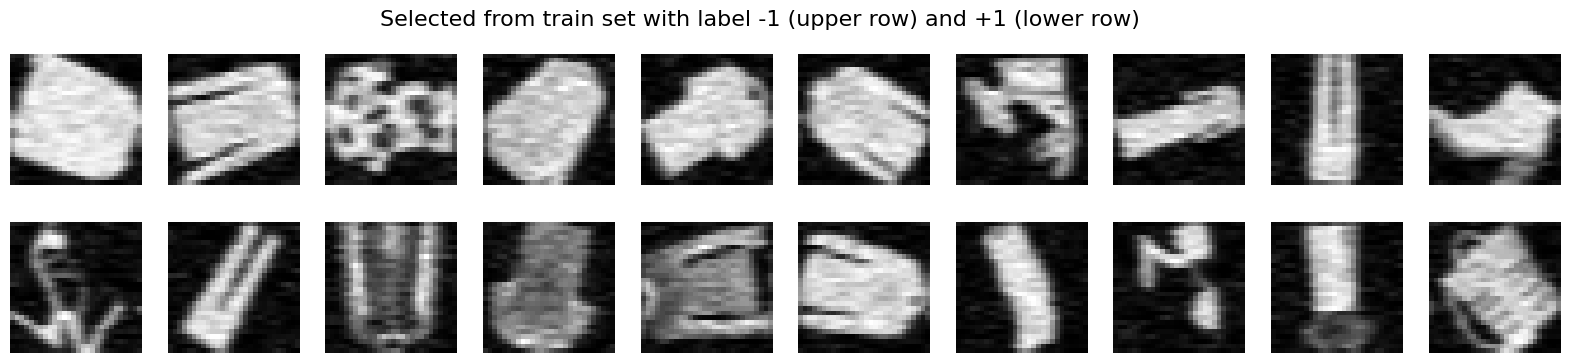

In [20]:
import matplotlib.pyplot as plt

num_classes = 2
class_labels = [-1, 1]

# Create a figure for plotting
fig, axes = plt.subplots(num_classes, 10, figsize=(20, 4))

# Iterate through each class
for i in range(num_classes):
    # Select 10 random objects from each class
    class_indices = np.where(Ytrain == class_labels[i])[0]
    random_indices = np.random.choice(class_indices, size=10, replace=False)
    random_objects = Xtest_smoothed[random_indices]

    # Reshape and display the flattened 28x28 arrays
    for j in range(10):
        axes[i, j].matshow(random_objects[j].reshape(28, 28), cmap='gray')
        axes[i, j].axis('off')

# Add a title to the entire figure
plt.suptitle('Selected from train set with label -1 (upper row) and +1 (lower row)', fontsize=16)

plt.show()

In [12]:
Ytrain_ = np.full(Xtrain.shape[0], -1)
Ytest_ = np.full(Xtest.shape[0], 1)

Xmerged = np.concatenate((Xtrain, Xtest), axis=0)
Ymerged = np.concatenate((Ytrain_, Ytest_), axis=0)

Xmerged_rotated = np.concatenate((Xtrain_rotated, Xtest), axis=0)

In [14]:
def average_metrics(classifier, X, Y):

    # Add a new function to calculate PR AUC
    def pr_auc_score(y_true, y_pred):
        precision, recall, _ = precision_recall_curve(y_true, y_pred)
        return auc(recall, precision)
    
    metrics = {
        'Accuracy': accuracy_score,
        'Balanced Accuracy': balanced_accuracy_score,
        'ROC AUC': roc_auc_score,
        'PR AUC': pr_auc_score,
        'F1 Score': f1_score,
        'MCC': matthews_corrcoef
    }

    # Perform 5-fold stratified cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    metric_values_list = {metric_name: [] for metric_name in metrics}

    for train_index, test_index in skf.split(X, Y):
        X_train_fold, X_test_fold = X[train_index], X[test_index]
        Y_train_fold, Y_test_fold = Y[train_index], Y[test_index]

        # Fit the classifier on the training data
        classifier.fit(X_train_fold, Y_train_fold)

        # Loop through each metric
        for metric_name, metric_func in metrics.items():
            # Make predictions on the test data
                predictions = classifier.predict(X_test_fold)
                probabilities = classifier.predict_proba(X_test_fold)[:, 1]

                # Calculate the metric for this fold
                if metric_name in ['ROC AUC', 'PR AUC']:
                    metric_value = metric_func(Y_test_fold, probabilities)
                else:
                    metric_value = metric_func(Y_test_fold, predictions)
                metric_values_list[metric_name].append(metric_value)
        
    # Print the average and standard deviation of the metrics across all folds
    for metric_name, metric_values in metric_values_list.items():
        average_value = np.mean(metric_values)
        std_dev_value = np.std(metric_values)
        print(f"Average {metric_name}: {average_value:.4f} (Std Dev: {std_dev_value:.4f})")

In [16]:
data_type = {
    'Original': Xmerged,
    'Rotated': Xmerged_rotated
}

In [17]:
test_classifier = KNeighborsClassifier(n_neighbors=5)

print('='*51)

# Loop through each data type
for type_name, type_data in data_type.items():
    print(f"Results for {type_name}:\n{'-'*51}")
    average_metrics(test_classifier, type_data, Ymerged)
    print('='*51)

Results for Original:
---------------------------------------------------
Average Accuracy: 0.9240 (Std Dev: 0.0074)
Average Balanced Accuracy: 0.9240 (Std Dev: 0.0074)
Average ROC AUC: 0.9671 (Std Dev: 0.0036)
Average PR AUC: 0.9782 (Std Dev: 0.0034)
Average F1 Score: 0.9193 (Std Dev: 0.0082)
Average MCC: 0.8537 (Std Dev: 0.0140)
Results for Rotated:
---------------------------------------------------
Average Accuracy: 0.5775 (Std Dev: 0.0173)
Average Balanced Accuracy: 0.5775 (Std Dev: 0.0173)
Average ROC AUC: 0.6043 (Std Dev: 0.0153)
Average PR AUC: 0.5980 (Std Dev: 0.0208)
Average F1 Score: 0.5311 (Std Dev: 0.0227)
Average MCC: 0.1582 (Std Dev: 0.0349)
